# 1. Problem Definition
Given the 12 influencing feature, how close can we predict the house prices in india? Let's consider an accuracy of 95%

## Exploratory Data Analysis

Let's analyse the dataset from kaggle to understand what each feature means?

In [3]:
# Importing libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("data/House_price/train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [6]:
df.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


# Features
1. `POSTED_BY` - who posted the house for sale
2. `UNDER_CONSTRUCTION` - whether the house is under construction or not
3. `RERA` - RERA is a set of rules and regulation passed in 2016 to maintain transparency between the dealer and buyer to make sure the deal is not havily favoured for developer
4. `BHK_NO` - Bedroom, Hall and Kitchen
5. `BHK_OR_RK` - Bedroom, Hall, Kitchecn or Room and Kitchen
7. `READY_TO_MOVE` - is the house ready to move or not
8. `RESALE` - is the house resold
9. `ADDRESS` - Address of the house
10. `LONGITUDE` - Longitude of the house
11. `LATITUDE` - Latitiude of the house

In [7]:
# Saving the nearest city or locality as a seprate feature
df["LOCALITY"] = df["ADDRESS"].str.split(',').str[-1]

In [8]:
df.LOCALITY.unique()

array(['Bangalore', 'Mysore', 'Ghaziabad', 'Kolkata', 'Kochi', 'Jaipur',
       'Mohali', 'Chennai', 'Siliguri', 'Noida', 'Raigad', 'Bhubaneswar',
       'Wardha', 'Pune', 'Mumbai', 'Nagpur', 'Deoghar', 'Bhiwadi',
       'Faridabad', 'Lalitpur', 'Maharashtra', 'Vadodara',
       'Visakhapatnam', 'Vapi', 'Mangalore', 'Aurangabad', 'Ottapalam',
       'Vijayawada', 'Belgaum', 'Bhopal', 'Lucknow', 'Kanpur',
       'Gandhinagar', 'Pondicherry', 'Agra', 'Ranchi', 'Gurgaon', 'Udupi',
       'Indore', 'Jodhpur', 'Coimbatore', 'Valsad', 'Palghar', 'Surat',
       'Varanasi', 'Guwahati', 'Amravati', 'Anand', 'Tirupati',
       'Secunderabad', 'Raipur', 'Vizianagaram', 'Thrissur', 'Satna',
       'Madurai', 'Chandigarh', 'Shimla', 'Gwalior', 'Rajkot', 'Sonipat',
       'Allahabad', 'Berhampur', 'Roorkee', 'Dharuhera', 'Latur',
       'Durgapur', 'Panchkula', 'Solapur', 'Durg', 'Goa', 'Jamshedpur',
       'Hazaribagh', 'Jabalpur', 'Hosur', 'Morbi', 'Hubli', 'Karnal',
       'Patna', 'Bilaspur', '

In [9]:
df.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
LOCALITY                 0
dtype: int64

**Okay That's great there's no nan values that needs to be filled in the dataset**

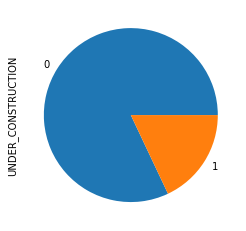

In [10]:
df["UNDER_CONSTRUCTION"].value_counts().plot(kind="pie");
plt.savefig("images/House_price/under-construction-value-counts.png")

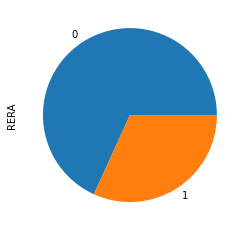

In [11]:
df["RERA"].value_counts().plot(kind="pie");
plt.savefig("images/House_price/rera-value-counts.png")

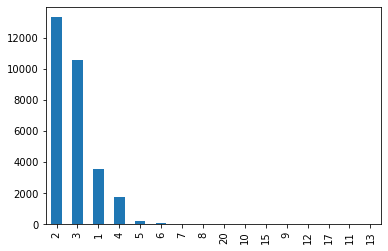

In [12]:
df["BHK_NO."].value_counts().plot(kind="bar");
plt.savefig("images/House_price/bhk-no-value-counts.png")

In [13]:
outlier = np.arange(6, 10, 1)
df[ df["BHK_NO."].isin(outlier) ].count()

POSTED_BY                76
UNDER_CONSTRUCTION       76
RERA                     76
BHK_NO.                  76
BHK_OR_RK                76
SQUARE_FT                76
READY_TO_MOVE            76
RESALE                   76
ADDRESS                  76
LONGITUDE                76
LATITUDE                 76
TARGET(PRICE_IN_LACS)    76
LOCALITY                 76
dtype: int64

Let's remove the outliers in BHK_NO.

In [14]:
df = df[df["BHK_NO."] < 6]

In [15]:
df.count()

POSTED_BY                29357
UNDER_CONSTRUCTION       29357
RERA                     29357
BHK_NO.                  29357
BHK_OR_RK                29357
SQUARE_FT                29357
READY_TO_MOVE            29357
RESALE                   29357
ADDRESS                  29357
LONGITUDE                29357
LATITUDE                 29357
TARGET(PRICE_IN_LACS)    29357
LOCALITY                 29357
dtype: int64

In [16]:
df["BHK_NO."].unique()

array([2, 3, 1, 4, 5])

In [17]:
df["SQUARE_FT"].describe()

count    2.935700e+04
mean     1.984703e+04
std      1.904376e+06
min      3.000000e+00
25%      9.000000e+02
50%      1.173170e+03
75%      1.550074e+03
max      2.545455e+08
Name: SQUARE_FT, dtype: float64

In [18]:
df["SQUARE_FT"] = df["SQUARE_FT"].astype('int')

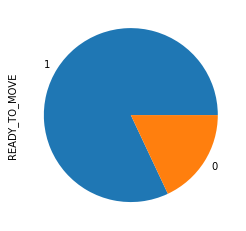

In [19]:
df["READY_TO_MOVE"].value_counts().plot(kind="pie");
plt.savefig("images/House_price/ready-to-move.png")

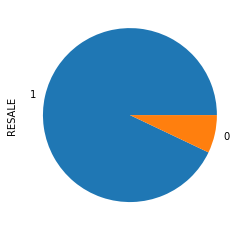

In [20]:
df["RESALE"].value_counts().plot(kind="pie")
plt.savefig("images/House_price/resale-value-counts.png")

In [21]:
df["TARGET(PRICE_IN_LACS)"].describe()

count    29357.000000
mean       140.782492
std        652.935251
min          0.250000
25%         38.000000
50%         61.500000
75%        100.000000
max      30000.000000
Name: TARGET(PRICE_IN_LACS), dtype: float64

## Preparing the data for modelling

In [22]:
df.head().T

,0,1,2,3,4
POSTED_BY,Owner,Dealer,Owner,Owner,Dealer
UNDER_CONSTRUCTION,0,0,0,0,1
RERA,0,0,0,1,0
BHK_NO.,2,2,2,2,2
BHK_OR_RK,BHK,BHK,BHK,BHK,BHK
SQUARE_FT,1300,1275,933,929,999
READY_TO_MOVE,1,1,1,1,0
RESALE,1,1,1,1,1
ADDRESS,"Ksfc Layout,Bangalore","Vishweshwara Nagar,Mysore","Jigani,Bangalore","Sector-1 Vaishali,Ghaziabad","New Town,Kolkata"
LONGITUDE,12.96991,12.274538,12.778033,28.6423,22.5922


### Converting the string values into categorical values

One way to do this is to convert strim column datatypes into categorical datatypes using [Pandas Types API](https://pandas.pydata.org/pandas-docs/stable/reference/general_utility_functions.html#data-types-related-functionality)

In [23]:
pd.api.types.is_string_dtype(df["LOCALITY"])

True

In [24]:
# OKay let's convert is now
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29357 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   POSTED_BY              29357 non-null  category
 1   UNDER_CONSTRUCTION     29357 non-null  int64   
 2   RERA                   29357 non-null  int64   
 3   BHK_NO.                29357 non-null  int64   
 4   BHK_OR_RK              29357 non-null  category
 5   SQUARE_FT              29357 non-null  int64   
 6   READY_TO_MOVE          29357 non-null  int64   
 7   RESALE                 29357 non-null  int64   
 8   ADDRESS                29357 non-null  category
 9   LONGITUDE              29357 non-null  float64 
 10  LATITUDE               29357 non-null  float64 
 11  TARGET(PRICE_IN_LACS)  29357 non-null  float64 
 12  LOCALITY               29357 non-null  category
dtypes: category(4), float64(3), int64(6)
memory usage: 2.7 MB


In [26]:
df["POSTED_BY"].cat.categories

Index(['Builder', 'Dealer', 'Owner'], dtype='object')

All our data are converted into categorical features

In [27]:
# Check if there's any null values
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label + "has null values")

In [28]:
df.isna().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
LOCALITY                 0
dtype: int64

In [29]:
# Check columns are not numeric
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

POSTED_BY
BHK_OR_RK
ADDRESS
LOCALITY


In [30]:
## Turn categorical values into numerical
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label] = pd.Categorical(content).codes

In [31]:
df.head().T

,0,1,2,3,4
POSTED_BY,2.00000,1.000000,2.000000,2.0000,1.000000
UNDER_CONSTRUCTION,0.00000,0.000000,0.000000,0.0000,1.000000
RERA,0.00000,0.000000,0.000000,1.0000,0.000000
BHK_NO.,2.00000,2.000000,2.000000,2.0000,2.000000
BHK_OR_RK,0.00000,0.000000,0.000000,0.0000,0.000000
SQUARE_FT,1300.00000,1275.000000,933.000000,929.0000,999.000000
READY_TO_MOVE,1.00000,1.000000,1.000000,1.0000,0.000000
RESALE,1.00000,1.000000,1.000000,1.0000,1.000000
ADDRESS,2826.00000,6539.000000,2241.000000,5067.0000,3809.000000
LONGITUDE,12.96991,12.274538,12.778033,28.6423,22.592200


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29357 entries, 0 to 29450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29357 non-null  int8   
 1   UNDER_CONSTRUCTION     29357 non-null  int64  
 2   RERA                   29357 non-null  int64  
 3   BHK_NO.                29357 non-null  int64  
 4   BHK_OR_RK              29357 non-null  int8   
 5   SQUARE_FT              29357 non-null  int64  
 6   READY_TO_MOVE          29357 non-null  int64  
 7   RESALE                 29357 non-null  int64  
 8   ADDRESS                29357 non-null  int16  
 9   LONGITUDE              29357 non-null  float64
 10  LATITUDE               29357 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29357 non-null  float64
 12  LOCALITY               29357 non-null  int16  
dtypes: float64(3), int16(2), int64(6), int8(2)
memory usage: 2.4 MB


In [33]:
X = df.drop("TARGET(PRICE_IN_LACS)", axis=1)
Y = df["TARGET(PRICE_IN_LACS)"]

Now all our data are converted into numeric with no missing values, Let's model

## Modelling

Let's start with RandomForestRegressor

In [34]:
X.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,LOCALITY
0,2,0,0,2,0,1300,1,1,2826,12.969910,77.597960,21
1,1,0,0,2,0,1275,1,1,6539,12.274538,76.644605,159
2,2,0,0,2,0,933,1,1,2241,12.778033,77.632191,21
3,2,0,1,2,0,929,1,1,5067,28.642300,77.344500,77
4,1,1,0,2,0,999,0,1,3809,22.592200,88.484911,133


In [44]:
# Using randomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=20, random_state=42)

In [45]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [47]:
model.score(X_test, y_test)

0.27812573141125563

In [49]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, model.predict(X_test))

50.73134255952381

In [56]:
pred_v_truth = pd.DataFrame({
    "Truth": y_test,
    "Pred": model.predict(X_test)
})

In [58]:
pred_v_truth["Diff"] = pred_v_truth["Truth"] - pred_v_truth["Pred"]

In [59]:
pred_v_truth

,Truth,Pred,Diff
8398,70.0,69.522500,0.477500
5661,210.0,200.400000,9.600000
26402,100.0,101.706333,-1.706333
24789,90.0,83.493000,6.507000
3800,8.0,13.110000,-5.110000
28514,81.0,108.440000,-27.440000
28602,15.0,19.443786,-4.443786
7766,150.0,186.800000,-36.800000
12768,89.7,88.587923,1.112077
3171,1050.0,226.052167,823.947833


For the outliers the models performance is little bad. Made a mistake in converting address to categorical feature which is not categorical. Let' prerpocess the data once again and try fitting the model again.